Train NN from the Data Set

Expect to receive a 1G RR

For now, each different reactions of a specific nuclide has its own NN

In [1]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import os
import csv

from numpy import genfromtxt

import openmc
import openmc.mgxs
import openmc.model

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

Read Training Date from CSV Files

In [2]:
n_energy = 1000
max_iters = 5

In [3]:
energy_bin= np.logspace(6, 8, num=1000)

In [4]:
flux = genfromtxt('flux.csv', delimiter=',')
n2n = genfromtxt('n2n.csv', delimiter=',')
n3n = genfromtxt('n3n.csv', delimiter=',')

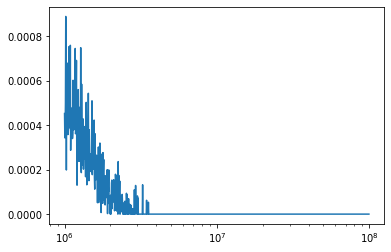

In [5]:
plt.semilogx(energy_bin[:-1],flux[3])

### Neural Net

In [6]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(5, activation='tanh'))
model.add(layers.Dense(5, activation='tanh'))
model.add(layers.Dense(1))

In [7]:
optimizer = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer,loss='mean_squared_error', metrics=['accuracy'])

In [8]:
def scheduler(epoch):
    if epoch < 300:
        return 0.01
    else:
        return 0.01 * np.exp(0.01 * (300 - epoch))
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [26]:
np.shape(X_train)

(5, 999)

In [27]:
np.shape(Y_train)

(5,)

In [9]:
X_train = flux
Y_train = n2n
model.fit(X_train, Y_train, epochs=500, callbacks=[callback])

Train on 5 samples
Epoch 1/500
5/5 [==============================] - 0s 58ms/sample - loss: 2.0865e-05 - accuracy: 0.2000
Epoch 2/500
5/5 [==============================] - 0s 569us/sample - loss: 0.0073 - accuracy: 0.2000
Epoch 3/500
5/5 [==============================] - 0s 396us/sample - loss: 2.6986e-04 - accuracy: 0.2000
Epoch 4/500
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.2000
Epoch 5/500
5/5 [==============================] - 0s 798us/sample - loss: 0.0040 - accuracy: 0.2000
Epoch 6/500
5/5 [==============================] - 0s 406us/sample - loss: 0.0027 - accuracy: 0.2000
Epoch 7/500
5/5 [==============================] - 0s 461us/sample - loss: 6.9590e-04 - accuracy: 0.2000
Epoch 8/500
5/5 [==============================] - 0s 2ms/sample - loss: 9.5993e-06 - accuracy: 0.2000
Epoch 9/500
5/5 [==============================] - 0s 541us/sample - loss: 5.8974e-04 - accuracy: 0.2000
Epoch 10/500
5/5 [==============================] - 0s 85

Epoch 80/500
5/5 [==============================] - 0s 709us/sample - loss: 6.7265e-07 - accuracy: 0.2000
Epoch 81/500
5/5 [==============================] - 0s 1ms/sample - loss: 9.2557e-07 - accuracy: 0.2000
Epoch 82/500
5/5 [==============================] - 0s 2ms/sample - loss: 8.5494e-07 - accuracy: 0.2000
Epoch 83/500
5/5 [==============================] - 0s 675us/sample - loss: 5.3514e-07 - accuracy: 0.2000
Epoch 84/500
5/5 [==============================] - 0s 751us/sample - loss: 1.9568e-07 - accuracy: 0.2000
Epoch 85/500
5/5 [==============================] - 0s 1ms/sample - loss: 4.2057e-08 - accuracy: 0.2000
Epoch 86/500
5/5 [==============================] - 0s 795us/sample - loss: 1.2188e-07 - accuracy: 0.2000
Epoch 87/500
5/5 [==============================] - 0s 618us/sample - loss: 3.1914e-07 - accuracy: 0.2000
Epoch 88/500
5/5 [==============================] - 0s 664us/sample - loss: 4.6021e-07 - accuracy: 0.2000
Epoch 89/500
5/5 [==============================] - 

Epoch 158/500
5/5 [==============================] - 0s 493us/sample - loss: 1.9466e-08 - accuracy: 0.2000
Epoch 159/500
5/5 [==============================] - 0s 495us/sample - loss: 1.9367e-08 - accuracy: 0.2000
Epoch 160/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.9119e-08 - accuracy: 0.2000
Epoch 161/500
5/5 [==============================] - 0s 606us/sample - loss: 1.8785e-08 - accuracy: 0.2000
Epoch 162/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.8498e-08 - accuracy: 0.2000
Epoch 163/500
5/5 [==============================] - 0s 653us/sample - loss: 1.8327e-08 - accuracy: 0.2000
Epoch 164/500
5/5 [==============================] - 0s 576us/sample - loss: 1.8223e-08 - accuracy: 0.2000
Epoch 165/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.8086e-08 - accuracy: 0.2000
Epoch 166/500
5/5 [==============================] - 0s 590us/sample - loss: 1.7867e-08 - accuracy: 0.2000
Epoch 167/500
5/5 [========================

Epoch 235/500
5/5 [==============================] - 0s 713us/sample - loss: 8.0790e-09 - accuracy: 0.2000
Epoch 236/500
5/5 [==============================] - 0s 837us/sample - loss: 7.9791e-09 - accuracy: 0.2000
Epoch 237/500
5/5 [==============================] - 0s 638us/sample - loss: 7.8801e-09 - accuracy: 0.2000
Epoch 238/500
5/5 [==============================] - 0s 1ms/sample - loss: 7.7822e-09 - accuracy: 0.2000
Epoch 239/500
5/5 [==============================] - 0s 803us/sample - loss: 7.6852e-09 - accuracy: 0.2000
Epoch 240/500
5/5 [==============================] - 0s 689us/sample - loss: 7.5890e-09 - accuracy: 0.2000
Epoch 241/500
5/5 [==============================] - 0s 882us/sample - loss: 7.4940e-09 - accuracy: 0.2000
Epoch 242/500
5/5 [==============================] - 0s 1ms/sample - loss: 7.4000e-09 - accuracy: 0.2000
Epoch 243/500
5/5 [==============================] - 0s 830us/sample - loss: 7.3069e-09 - accuracy: 0.2000
Epoch 244/500
5/5 [======================

Epoch 312/500
5/5 [==============================] - 0s 544us/sample - loss: 2.8569e-09 - accuracy: 0.2000
Epoch 313/500
5/5 [==============================] - 0s 895us/sample - loss: 2.8194e-09 - accuracy: 0.2000
Epoch 314/500
5/5 [==============================] - 0s 755us/sample - loss: 2.7828e-09 - accuracy: 0.2000
Epoch 315/500
5/5 [==============================] - 0s 455us/sample - loss: 2.7469e-09 - accuracy: 0.2000
Epoch 316/500
5/5 [==============================] - 0s 602us/sample - loss: 2.7118e-09 - accuracy: 0.2000
Epoch 317/500
5/5 [==============================] - 0s 2ms/sample - loss: 2.6775e-09 - accuracy: 0.2000
Epoch 318/500
5/5 [==============================] - 0s 548us/sample - loss: 2.6438e-09 - accuracy: 0.2000
Epoch 319/500
5/5 [==============================] - 0s 615us/sample - loss: 2.6109e-09 - accuracy: 0.2000
Epoch 320/500
5/5 [==============================] - 0s 935us/sample - loss: 2.5787e-09 - accuracy: 0.2000
Epoch 321/500
5/5 [====================

Epoch 389/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.3583e-09 - accuracy: 0.2000
Epoch 390/500
5/5 [==============================] - 0s 695us/sample - loss: 1.3491e-09 - accuracy: 0.2000
Epoch 391/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.3402e-09 - accuracy: 0.2000
Epoch 392/500
5/5 [==============================] - 0s 675us/sample - loss: 1.3313e-09 - accuracy: 0.2000
Epoch 393/500
5/5 [==============================] - 0s 832us/sample - loss: 1.3226e-09 - accuracy: 0.2000
Epoch 394/500
5/5 [==============================] - 0s 1ms/sample - loss: 1.3141e-09 - accuracy: 0.2000
Epoch 395/500
5/5 [==============================] - 0s 665us/sample - loss: 1.3056e-09 - accuracy: 0.2000
Epoch 396/500
5/5 [==============================] - 0s 518us/sample - loss: 1.2973e-09 - accuracy: 0.2000
Epoch 397/500
5/5 [==============================] - 0s 966us/sample - loss: 1.2891e-09 - accuracy: 0.2000
Epoch 398/500
5/5 [========================

Epoch 466/500
5/5 [==============================] - 0s 718us/sample - loss: 9.3029e-10 - accuracy: 0.2000
Epoch 467/500
5/5 [==============================] - 0s 561us/sample - loss: 9.2710e-10 - accuracy: 0.2000
Epoch 468/500
5/5 [==============================] - 0s 926us/sample - loss: 9.2399e-10 - accuracy: 0.2000
Epoch 469/500
5/5 [==============================] - 0s 726us/sample - loss: 9.2088e-10 - accuracy: 0.2000
Epoch 470/500
5/5 [==============================] - 0s 638us/sample - loss: 9.1782e-10 - accuracy: 0.2000
Epoch 471/500
5/5 [==============================] - 0s 510us/sample - loss: 9.1479e-10 - accuracy: 0.2000
Epoch 472/500
5/5 [==============================] - 0s 649us/sample - loss: 9.1180e-10 - accuracy: 0.2000
Epoch 473/500
5/5 [==============================] - 0s 641us/sample - loss: 9.0886e-10 - accuracy: 0.2000
Epoch 474/500
5/5 [==============================] - 0s 523us/sample - loss: 9.0593e-10 - accuracy: 0.2000
Epoch 475/500
5/5 [==================

In [13]:
flux_eval = genfromtxt('flux_eval.csv', delimiter=',')
n2n_eval = genfromtxt('n2n_eval.csv', delimiter=',')
n3n_eval = genfromtxt('n3n_eval.csv', delimiter=',')

In [24]:
n2n_pred = model.predict(flux_eval)
n2n_pred

array([[-1.9138740e-04],
       [ 1.1449372e-03],
       [ 5.8344449e-06],
       [ 1.9825378e-03],
       [ 2.2905841e-03],
       [ 9.0646342e-04],
       [-2.2625117e-04],
       [-4.2398082e-05],
       [ 1.3955610e-03],
       [ 6.5903123e-03]], dtype=float32)

In [25]:
n2n_eval.reshape(-1,1)

array([[3.35439109e-07],
       [7.48022447e-04],
       [0.00000000e+00],
       [1.26038496e-03],
       [2.38652840e-03],
       [6.12129422e-04],
       [4.12762408e-05],
       [0.00000000e+00],
       [1.18022212e-03],
       [6.31925173e-03]])